In [11]:
from shapely.geometry import Point, Polygon
import pandas as pd
import momepy as mm
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# create a simple polygon
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(1, 0), (2, 0), (2, 1), (1, 1)])
p3 = Polygon([(0, 1), (1, 1), (1, 2), (0, 2)])
p4 = Polygon([(1, 1), (2, 1), (2, 2), (1, 2)])
p5 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
p6 = Polygon([(0, 2), (1, 2), (1, 3), (0, 3)])
p7 = Polygon([(1, 2), (2, 2), (2, 3), (1, 3)])
p8 = Polygon([(2, 1), (3, 1), (3, 2), (2, 2)])
p9 = Polygon([(2, 2), (3, 2), (3, 3), (2, 3)])
p10 = Polygon([(0, 3), (1, 3), (1, 4), (0, 4)])
p11 = Polygon([(1, 3), (2, 3), (2, 4), (1, 4)])
p12 = Polygon([(2, 3), (3, 3), (3, 4), (2, 4)])




In [22]:
# visualize all polygons
# create a list from A to J
attribs = {'owner': ['A', 'A', 'A', 'A', 'E', 'F', 'G', 'H', 'A', 'J', 'J', 'L']}
g = gpd.GeoDataFrame(attribs, geometry=[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12])



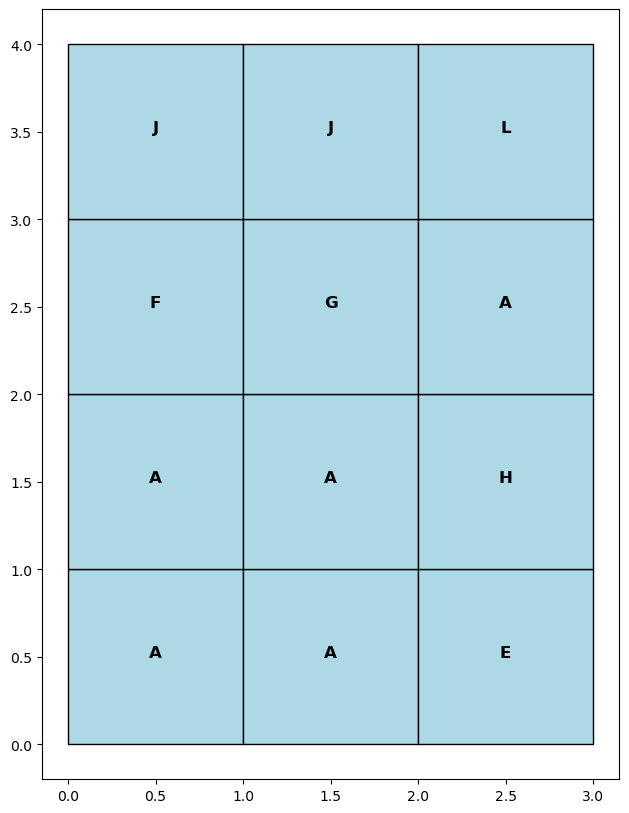

In [23]:
# visualize all polygons with their owner values
fig, ax = plt.subplots(figsize=(10, 10))
g.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Annotating each polygon with the 'owner' value at its centroid
for idx, row in g.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['owner'], horizontalalignment='center', fontsize=12, weight='bold')
plt.show()

In [24]:
total_parcels = len(g)
total_parcels

12

In [34]:
# Dissolve by 'owner' (this combines all polygons with the same owner)
g_dissolved = g.dissolve(by='owner')

# Explode the dissolved geometries to handle non-adjacent polygons
g_dissolved = g_dissolved.explode(index_parts=False).reset_index()
g_dissolved

,owner,geometry
0,A,"POLYGON ((0.00000 1.00000, 0.00000 2.00000, 1...."
1,A,"POLYGON ((3.00000 2.00000, 2.00000 2.00000, 2...."
2,E,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3...."
3,F,"POLYGON ((0.00000 2.00000, 1.00000 2.00000, 1...."
4,G,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2...."
5,H,"POLYGON ((2.00000 1.00000, 3.00000 1.00000, 3...."
6,J,"POLYGON ((0.00000 3.00000, 0.00000 4.00000, 1...."
7,L,"POLYGON ((2.00000 3.00000, 3.00000 3.00000, 3...."


In [35]:
sp_counts = len(g_dissolved[g_dissolved['owner'].map(g_dissolved['owner'].value_counts()) > 1])
sp_counts

2

In [36]:
# spatial join g with g_dissolved
g_sj = g.sjoin(g_dissolved, how='left', predicate='within')
g_sj

,owner_left,geometry,index_right,owner_right
0,A,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",0,A
1,A,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",0,A
2,A,"POLYGON ((0.00000 1.00000, 1.00000 1.00000, 1....",0,A
3,A,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2....",0,A
4,E,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",2,E
5,F,"POLYGON ((0.00000 2.00000, 1.00000 2.00000, 1....",3,F
6,G,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....",4,G
7,H,"POLYGON ((2.00000 1.00000, 3.00000 1.00000, 3....",5,H
8,A,"POLYGON ((2.00000 2.00000, 3.00000 2.00000, 3....",1,A
9,J,"POLYGON ((0.00000 3.00000, 1.00000 3.00000, 1....",6,J


In [37]:
dissolved_counts = len(g_sj[g_sj['index_right'].map(g_sj['index_right'].value_counts()) > 1])
dissolved_counts

6

In [38]:
non_dissolved_counts = len(g) - dissolved_counts
non_dissolved_counts

6

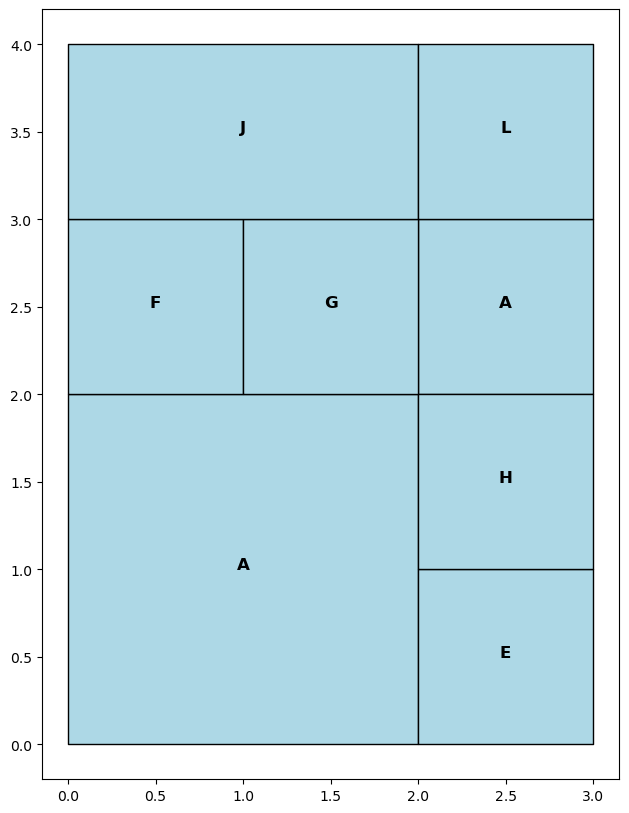

In [39]:
# use if viz isolates 
# g[g['owner'].map(g['owner'].value_counts()) > 1]

# Plot the result
fig, ax = plt.subplots(figsize=(10, 10))
g_dissolved.plot(ax=ax, edgecolor='black', facecolor='lightblue')

# Annotating the dissolved polygons with owner labels
for idx, row in g_dissolved.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['owner'], horizontalalignment='center', fontsize=12, weight='bold')

plt.show()

